### This notebook addes a Housing Price Index dataset 1981-2024

- Raw File in data/raw/Housing Price Index 1981-2024.csv

- CSV file in data/processed/Housing Price Index 1981-2024.csv

- SQL: table Housing_Price_Index

In [6]:
import pandas as pd

# Load the CSV file
file_path = '../data/raw/Housing Price Index 1981-2024.csv'
df = pd.read_csv(file_path)

# Replace missing values ('..' or 'x') with NaN
df.replace({'..': pd.NA, 'x': pd.NA}, inplace=True)

# Display the first few rows to understand the structure
df.head()

,Geography,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,...,Sep-23,Oct-23,Nov-23,Dec-23,Jan-24,Feb-24,Mar-24,Apr-24,May-24,Jun-24
0,Canada,36.1,36.5,37.3,38.1,38.9,39.1,39.2,39,39,...,127.8,127.6,127.2,127.2,127.1,127.2,127.2,127.6,128.0,127.7
1,Newfoundland and Labrador,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,110.0,110.0,108.6,108.6,108.6,108.6,108.4,108.4,108.8,108.8
2,"St. John's, Newfoundland and Labrador",37.5,37.5,37.5,37.5,37.7,37.7,37.7,37.8,37.8,...,110.0,110.0,108.6,108.6,108.6,108.6,108.4,108.4,108.8,108.8
3,Prince Edward Island,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0
4,"Charlottetown, Prince Edward Island",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0,127.0


In [9]:
# Rename the columns to a consistent datetime format before melting
date_columns = df.columns[1:]
df.rename(columns={col: pd.to_datetime(col, format='%b-%y', errors='coerce') for col in date_columns}, inplace=True)


In [10]:
# Melt the DataFrame to convert columns to rows
df_melted = df.melt(id_vars=[df.columns[0]], var_name='Date', value_name='Value')


In [11]:
df_melted

,Geography,Date,Value
0,Canada,1981-01-01 00:00:00,36.1
1,Newfoundland and Labrador,1981-01-01 00:00:00,NaN
2,"St. John's, Newfoundland and Labrador",1981-01-01 00:00:00,37.5
3,Prince Edward Island,1981-01-01 00:00:00,NaN
4,"Charlottetown, Prince Edward Island",1981-01-01 00:00:00,NaN
...,...,...,...
20353,"Edmonton, Alberta",2024-06-01 00:00:00,110.3
20354,British Columbia,2024-06-01 00:00:00,126.3
20355,"Kelowna, British Columbia",2024-06-01 00:00:00,124.2
20356,"Vancouver, British Columbia",2024-06-01 00:00:00,126.7


In [12]:
# Convert 'Date' column to datetime format and extract 'Month-Year'
df_melted['Date'] = pd.to_datetime(df_melted['Date'], errors='coerce')
df_melted['Month-Year'] = df_melted['Date'].dt.to_period('M')

In [13]:
# Pivot the DataFrame to have 'Month-Year' as rows and geography as columns
df_pivoted = df_melted.pivot_table(index='Month-Year', columns=df.columns[0], values='Value', aggfunc='mean')

# Reset index to flatten the DataFrame
df_pivoted.reset_index(inplace=True)

In [14]:
df_pivoted

Geography,Month-Year,Alberta,British Columbia,"Calgary, Alberta",Canada,"Charlottetown, Prince Edward Island","Edmonton, Alberta","Gatineau, Quebec","Greater Sudbury, Ontario","Guelph, Ontario",...,"Saskatoon, Saskatchewan","Sherbrooke, Quebec","St. Catharines-Niagara, Ontario","St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba"
0,1981-01,NaN,NaN,27.8,36.1,NaN,36.5,NaN,54.6,NaN,...,35.8,NaN,28.3,37.5,22.6,NaN,96.1,206.8,64.9,29.3
1,1981-02,NaN,NaN,28.1,36.5,NaN,36.8,NaN,55.6,NaN,...,35.8,NaN,28.6,37.5,23.2,NaN,97.5,209.1,64.9,29.7
2,1981-03,NaN,NaN,28.6,37.3,NaN,36.8,NaN,55.6,NaN,...,36.4,NaN,28.6,37.5,24.8,NaN,97.5,210.6,64.1,30.3
3,1981-04,NaN,NaN,30.1,38.1,NaN,36.9,NaN,57.0,NaN,...,37.3,NaN,28.6,37.5,26.5,NaN,97.7,210.6,63.9,30.5
4,1981-05,NaN,NaN,30.1,38.9,NaN,38.2,NaN,57.0,NaN,...,37.7,NaN,28.9,37.7,27.7,NaN,97.7,212.4,63.9,31.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2024-02,123.2,126.4,136.7,127.2,127.0,108.7,120.2,119.2,132.7,...,113.5,110.8,129.3,108.6,112.4,114.3,126.8,125.3,146.4,153.4
518,2024-03,123.6,126.5,137.3,127.2,127.0,108.9,120.2,119.2,132.7,...,113.7,110.8,129.3,108.4,112.4,114.3,126.8,126.0,146.4,153.4
519,2024-04,125.2,127.1,138.9,127.6,127.0,110.4,120.2,119.2,132.7,...,113.4,110.8,129.3,108.4,112.4,114.3,127.5,126.0,146.4,152.8
520,2024-05,126.6,127.3,141.6,128.0,127.0,110.3,119.9,118.6,132.7,...,114.9,110.5,129.3,108.8,112.4,116.2,127.6,127.0,146.4,153.0


In [19]:
# Save the transformed dataset to a new CSV file
output_path = '../data/processed/Housing_Price_Index_1981_2024.csv'
df_pivoted.to_csv(output_path, index=False)

# Display the first few rows of the transformed dataset
print("Transformed DataFrame:")
print(df_pivoted.tail())

Transformed DataFrame:
Geography Month-Year Alberta British Columbia Calgary, Alberta Canada  \
517          2024-02   123.2            126.4            136.7  127.2   
518          2024-03   123.6            126.5            137.3  127.2   
519          2024-04   125.2            127.1            138.9  127.6   
520          2024-05   126.6            127.3            141.6  128.0   
521          2024-06   127.3            126.3            143.0  127.7   

Geography Charlottetown, Prince Edward Island Edmonton, Alberta  \
517                                     127.0             108.7   
518                                     127.0             108.9   
519                                     127.0             110.4   
520                                     127.0             110.3   
521                                     127.0             110.3   

Geography Gatineau, Quebec Greater Sudbury, Ontario Guelph, Ontario  ...  \
517                  120.2                    119.2        

In [20]:
import pandas as pd
import sqlite3

# Load the transformed CSV file
transformed_file_path = '../data/processed/Housing_Price_Index_1981_2024.csv'
transformed_df = pd.read_csv(transformed_file_path)

# Connect to the SQLite database
db_path = '../data/sql/Canada_Housing_Prices_2005_2024.db'
conn = sqlite3.connect(db_path)

# Add the transformed data to the database
table_name = 'Housing_Price_Index'
transformed_df.to_sql(table_name, conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print(f"Data has been added to the database as table '{table_name}'")


Data has been added to the database as table 'Housing_Price_Index'


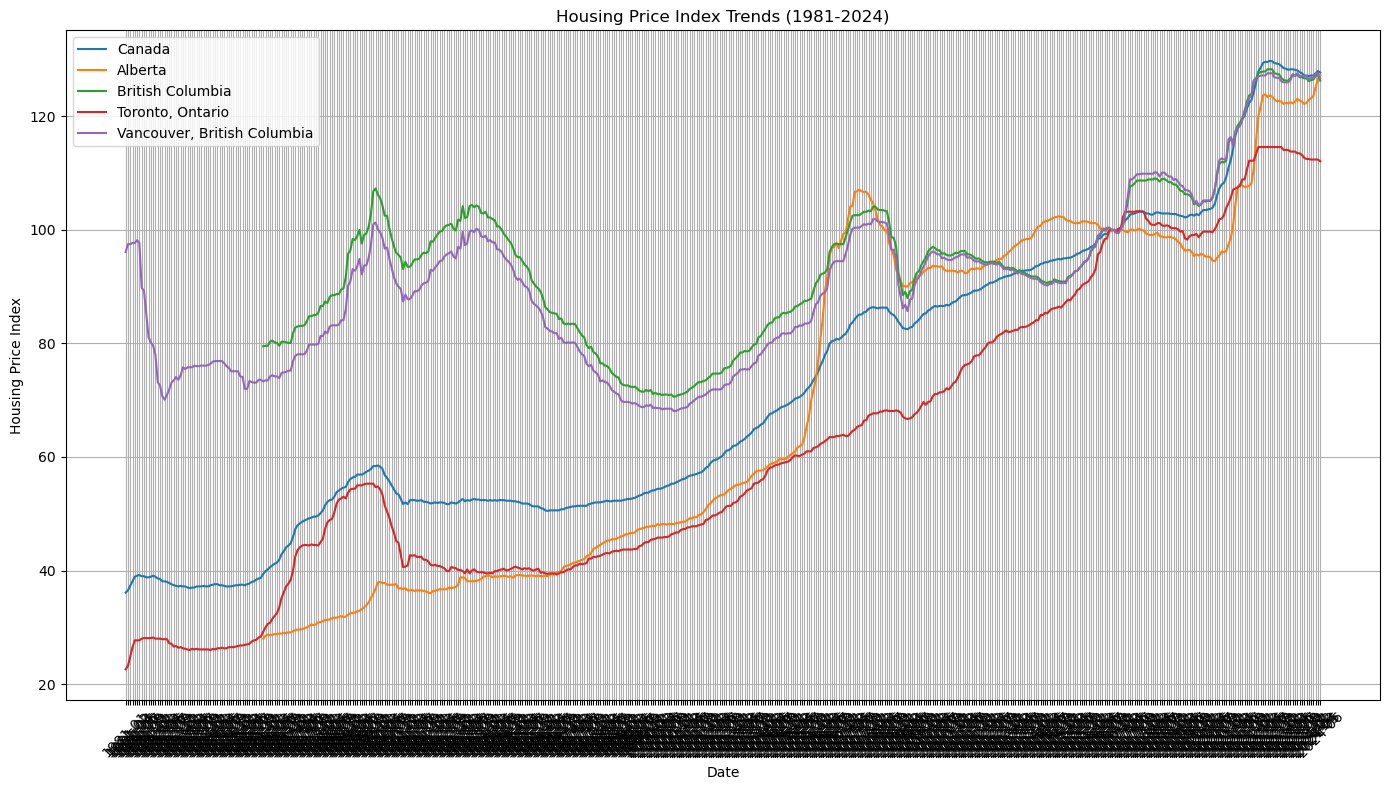

In [21]:
import matplotlib.pyplot as plt

# Select a few geographies to visualize
geographies = ['Canada', 'Alberta', 'British Columbia', 'Toronto, Ontario', 'Vancouver, British Columbia']

# Filter the DataFrame to include only the selected geographies
df_selected = df_pivoted[['Month-Year'] + geographies]

# Plot the data
plt.figure(figsize=(14, 8))

for geo in geographies:
    plt.plot(df_selected['Month-Year'].astype(str), df_selected[geo], label=geo)

plt.xlabel('Date')
plt.ylabel('Housing Price Index')
plt.title('Housing Price Index Trends (1981-2024)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
